In [1]:
#Deep Learning
#Neural Networks
#Neutral Networks 
 

In [2]:
import tensorflow as tf


In [3]:
import cv2
loc=r'natural-images'

In [4]:
import os  
label=[]
#os is library used to list down all the files in directory 
# used for dealing with directory
for i in os.listdir(loc):
    if i.split('_')[0]=='car':
        label.append(2)
    elif i.split('_')[0]=='motorbike':
        label.append(0)
    if i.split('_')[0]=='person':
        label.append(0)
#we are separating labels

In [5]:
#features we require now
features=[]
for i in os.listdir(loc):
    f=cv2.imread(os.path.join(loc,i))
    resized_f=cv2.resize(f,(70,70))   #resizing all imgaes
    features.append(resized_f)
    
#



In [6]:
import numpy as np
X=np.array(features)/255  #normalizing the pixel values
Y=np.array(label)

In [7]:
#tensor flow is frame work 
#keras and tflearn are libraries

In [8]:
#to use keras first you have to define model
model=tf.keras.models.Sequential()

In [9]:
#Dense is used to define how many neurons will be used
#input layers
#features dim are not known:use flatten
#features din are known: put into dense as 2d array
model.add(tf.keras.layers.Flatten())



#hidden layers(2)
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))



#output layers 
model.add(tf.keras.layers.Dense(3,activation ='softmax'))


In [10]:
# in categorial entropy you have to define data in form of binary 
#whereas in case of sparse you have to not
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

In [13]:
model.fit(xtrain,ytrain,epochs=10)   #Trainig accuracy

Train on 2056 samples
Epoch 1/10
2056/2056 [==============================] - 1s 421us/sample - loss: 0.0663 - accuracy: 0.9767
Epoch 2/10
2056/2056 [==============================] - 1s 419us/sample - loss: 0.0521 - accuracy: 0.9839
Epoch 3/10
2056/2056 [==============================] - 1s 418us/sample - loss: 0.0511 - accuracy: 0.9825
Epoch 4/10
2056/2056 [==============================] - 1s 414us/sample - loss: 0.0520 - accuracy: 0.9815
Epoch 5/10
2056/2056 [==============================] - 1s 415us/sample - loss: 0.0544 - accuracy: 0.9825
Epoch 6/10
2056/2056 [==============================] - 1s 412us/sample - loss: 0.0364 - accuracy: 0.9883
Epoch 7/10
2056/2056 [==============================] - 1s 419us/sample - loss: 0.0414 - accuracy: 0.9869
Epoch 8/10
2056/2056 [==============================] - 1s 414us/sample - loss: 0.0252 - accuracy: 0.9937
Epoch 9/10
2056/2056 [==============================] - 1s 415us/sample - loss: 0.0225 - accuracy: 0.9946
Epoch 10/10
2056/2056 [=

In [14]:
model.predict(xtest[40].reshape(1,70,70,3))#these are probabity oneuron

array([[9.9998510e-01, 8.1348765e-07, 1.4106789e-05]], dtype=float32)

In [15]:
np.argmax(model.predict(xtest[40].reshape(1,70,70,3)))

0

In [16]:
ytest[40]  #real output 

0

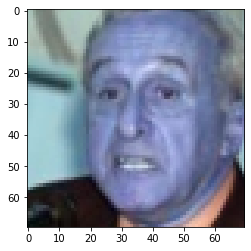

In [17]:
import matplotlib.pyplot as plt
plt.imshow(xtest[40])

In [18]:
pl=[]
for i in model.predict(xtest):
    
    pl.append(np.argmax(i))

In [19]:
(pl==ytest).sum()/len(xtest)     # no overfitting here like previous

0.9620991253644315